In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.shape)

df.describe()

(200, 5)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
print(df.dtypes)

print(df.info())

df.isnull().sum()

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.drop(['CustomerID'], axis= 1, inplace= True)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/tmp/ipykernel_13/1613635930.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins= 20) # or use sns.histplot(df[x], bins= 20, kde= True) as this is histplot is newer version
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/1613635930.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

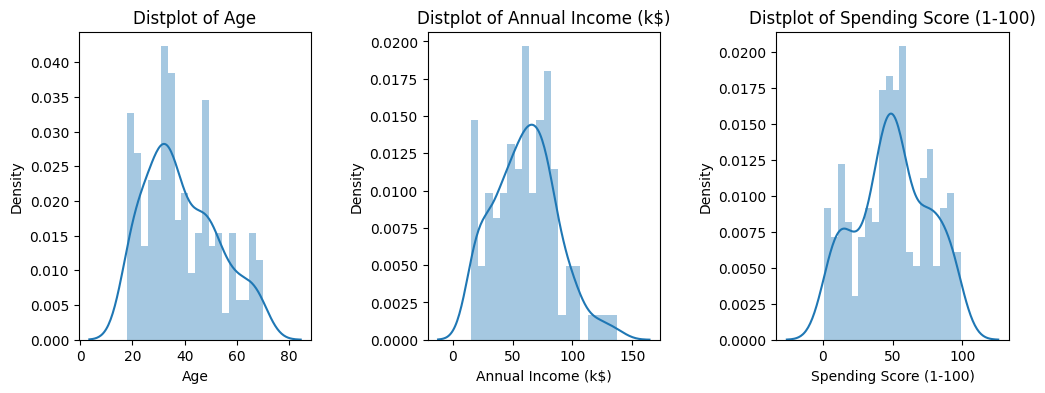

In [6]:
plt.figure(1, figsize= (12, 4))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace= 0.5, wspace= 0.5)
    sns.distplot(df[x], bins= 20) # or use sns.histplot(df[x], bins= 20, kde= True) as this is histplot is newer version
    plt.title("Distplot of {}".format(x))
    
plt.show()

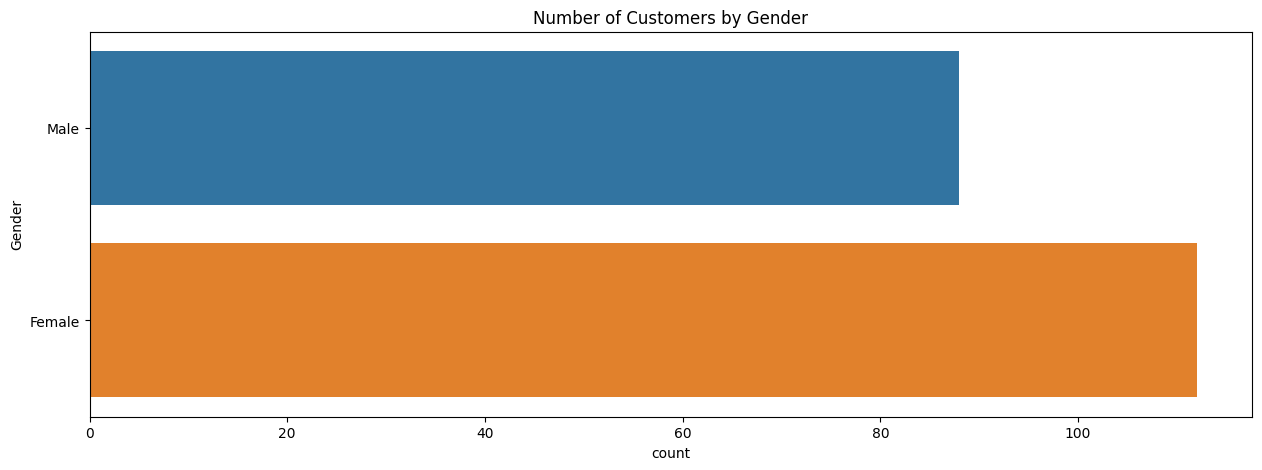

In [7]:
plt.figure(figsize= (15, 5))
sns.countplot(y= 'Gender', data= df)
plt.title("Number of Customers by Gender")
plt.show()

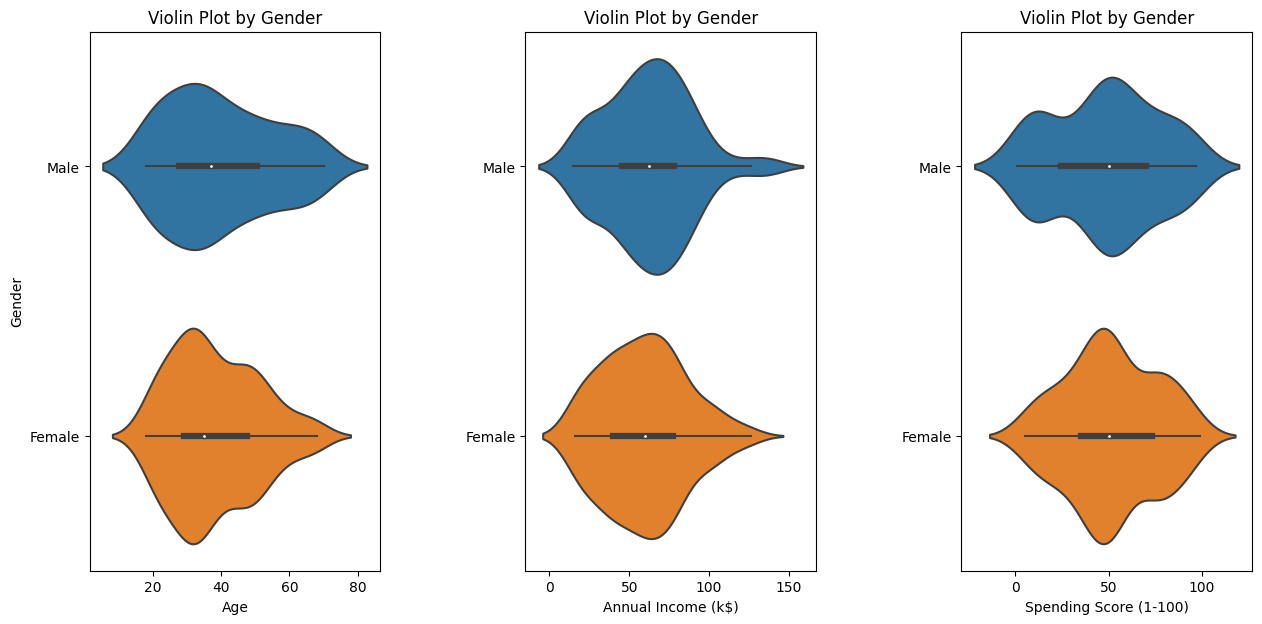

In [8]:
plt.figure(1, figsize= (15, 7))
n=0

for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    #sns.set(style= 'whitegrid')
    plt.subplots_adjust(hspace= 0.5, wspace= 0.5)
    sns.violinplot(x = cols, y= 'Gender', data= df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot by Gender')

plt.show()

In [9]:
# Creating group of ages for better understanding:

age_18_25 = df.Age[(df.Age >= 18) & (df.Age <=25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <=35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <=45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <=55)]
age_above_55 = df.Age[(df.Age >= 56)]

agex = ['18-25', '26-35', '36-45', '46-55', '55+']
agey = [len(age_18_25.values),
        len(age_26_35.values),
       len(age_36_45.values),
       len(age_46_55.values),
       len(age_above_55.values)]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


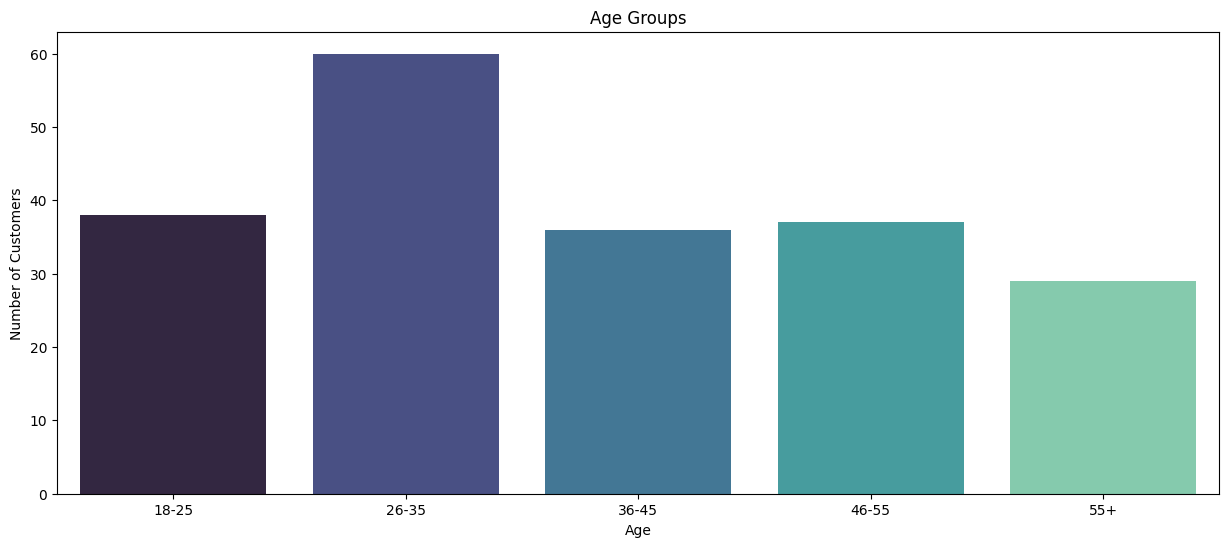

In [10]:
plt.figure(figsize= (15, 6))
sns.barplot(x= agex, y= agey, palette= 'mako')
plt.title("Age Groups")
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

In [11]:
# Creating groups of 'Spending Score' column and visualizing it:

ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]

ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]

ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]

ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]

ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

In [12]:
ssx = ['1-20', '21-40', '41-60', '61-80', '81-100']

ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


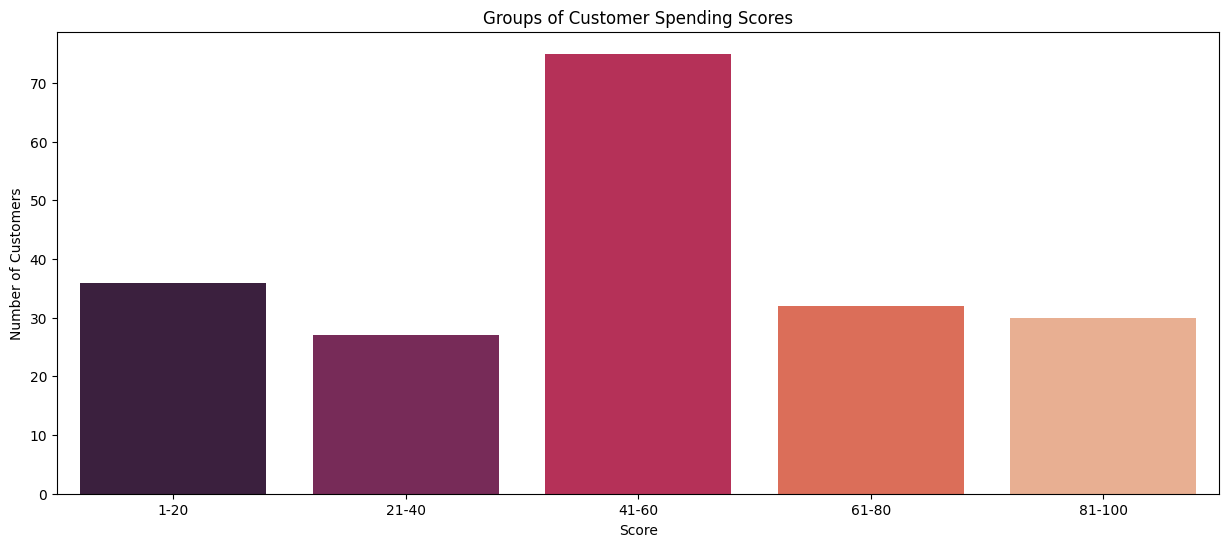

In [13]:
plt.figure(figsize= (15, 6))
sns.barplot(x= ssx, y= ssy, palette= 'rocket')
plt.title("Groups of Customer Spending Scores")
plt.xlabel('Score')
plt.ylabel('Number of Customers')

plt.show()

In [14]:
# Creating groups of 'Annual Income' column and visualizing it:

ann_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]

ann_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]

ann_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]

ann_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]

ann_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


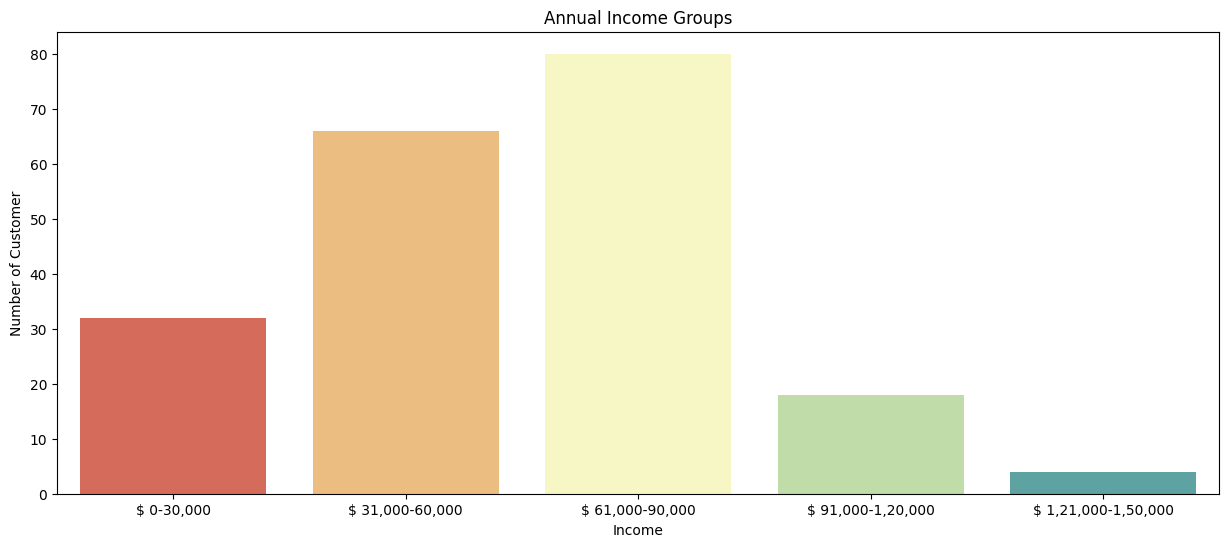

In [15]:
annx = ['$ 0-30,000','$ 31,000-60,000','$ 61,000-90,000','$ 91,000-1,20,000','$ 1,21,000-1,50,000']
anny = [len(ann_0_30.values),len(ann_31_60.values),len(ann_61_90.values),len(ann_91_120.values),len(ann_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = annx, y = anny, palette='Spectral')
plt.title('Annual Income Groups')
plt.xlabel('Income')
plt.ylabel('Number of Customer')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


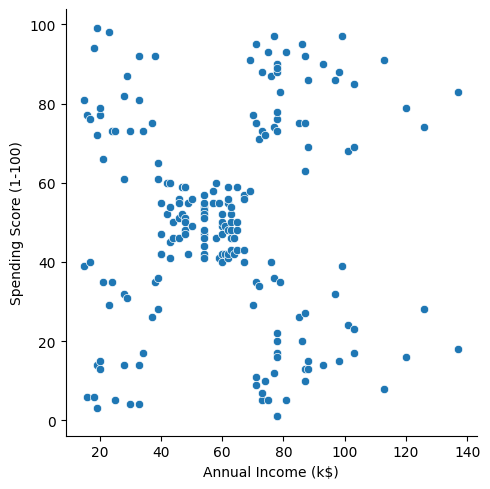

In [16]:
sns.relplot(x= 'Annual Income (k$)', y= 'Spending Score (1-100)', data= df)

# WCSS (Within-Cluster Sum of Squares)

* In **K-Means Clustering**, **WCSS (Within-Cluster Sum of Squares)** is a metric used to evaluate the compactness of clusters.

*  It represents the **sum of squared distances** between each data point and the **centroid** of its assigned cluster.

* The **"elbow method"** uses **WCSS** to help determine the **optimal number of clusters (k)** for a dataset by plotting WCSS values against different k values and looking for the "elbow" point where the rate of decrease in WCSS slows down. 

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

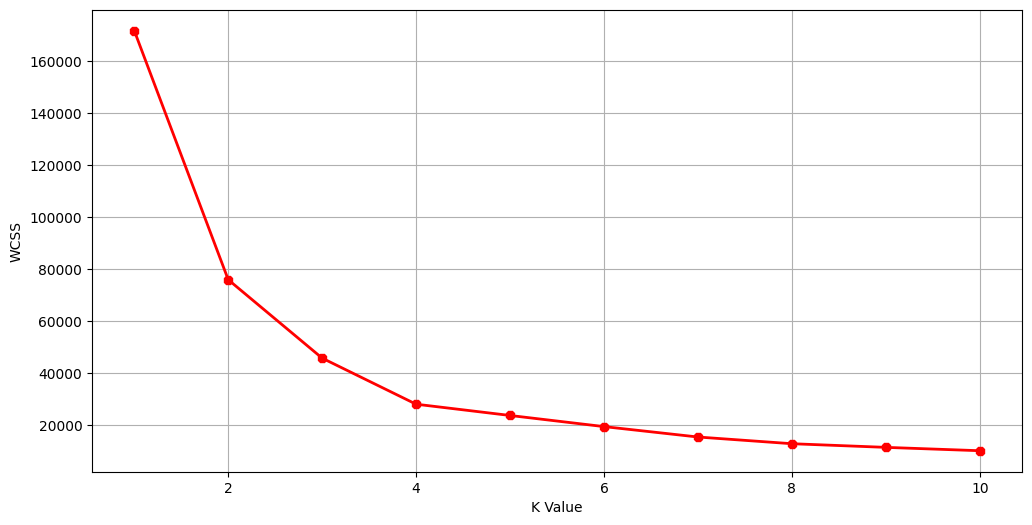

In [17]:
X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init= 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize= (12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth= 2, color= 'red', marker= '8')

plt.xlabel('K Value')
plt.ylabel('WCSS')

plt.show()

[0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 0 0 1 3 0 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1
 3 1 3 2 3 2 0 1 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 3 0 3 2 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 2 3
 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]
[[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [30.1754386  82.35087719]]


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


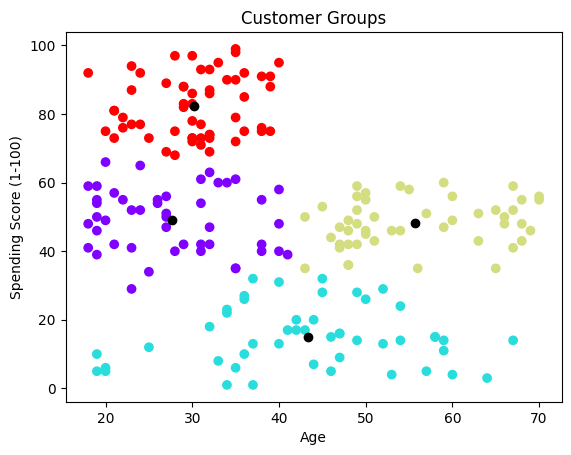

In [18]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X1)

print(label)

print(kmeans.cluster_centers_)

# Visualize our clusters (i.e. groups):

plt.scatter(X1[:, 0], X1[:, 1], c= kmeans.labels_, cmap= 'rainbow')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color= 'black')

plt.title("Customer Groups")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

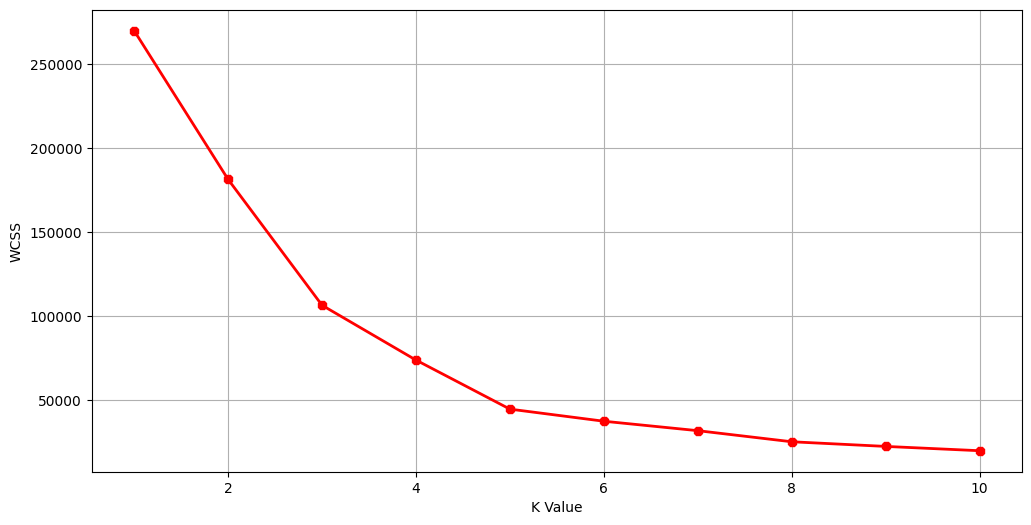

In [19]:
# Creating Clusters based on Annual Income and Spending Score:
X2 = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 4 3 2 3 4 3 4 3 2 3 4 3 4 3 4 3 4 3 2 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]
[[26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]]


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


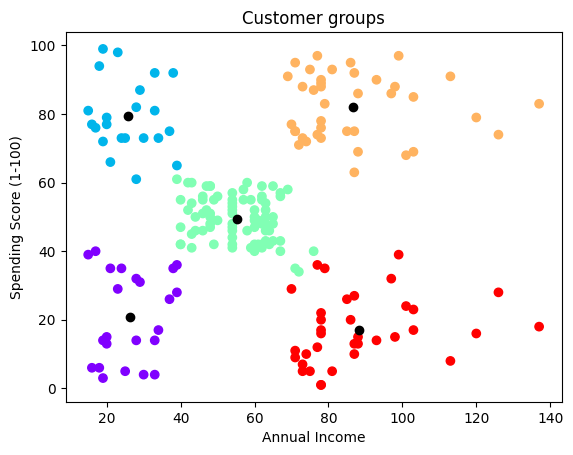

In [20]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X2)

print(label)

print(kmeans.cluster_centers_)

# visualize clusters:

plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

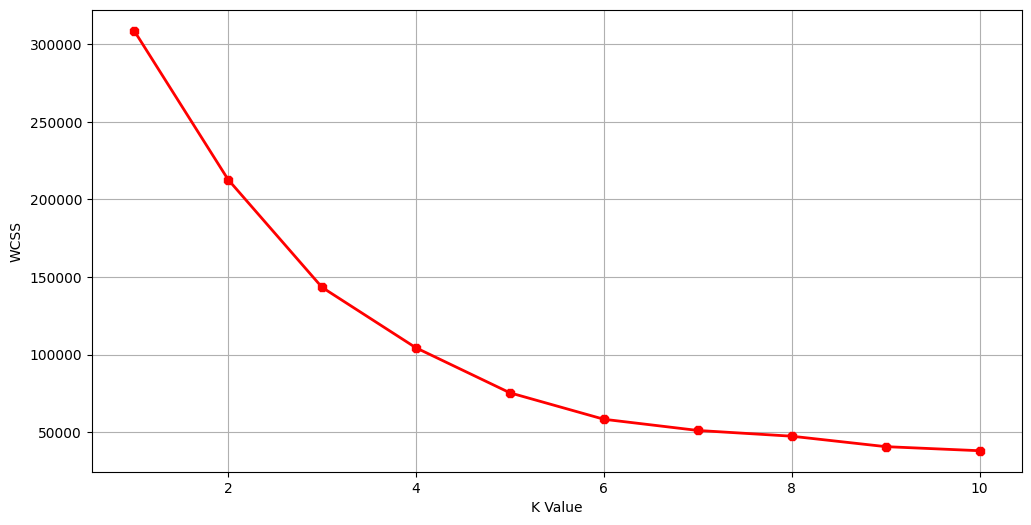

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
[[43.93421053 55.21052632 49.44736842]
 [32.69230769 86.53846154 82.12820513]
 [40.32432432 87.43243243 18.18918919]
 [45.2173913  26.30434783 20.91304348]
 [24.96       28.04       77.        ]]


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Creating a Clusters based on Age, Annual Income, and Spending Score:
X3 = df.iloc[:,1:]

wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()


# similarly as we have done above fit it and find centroids:

kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X3)

print(label)

print(kmeans.cluster_centers_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


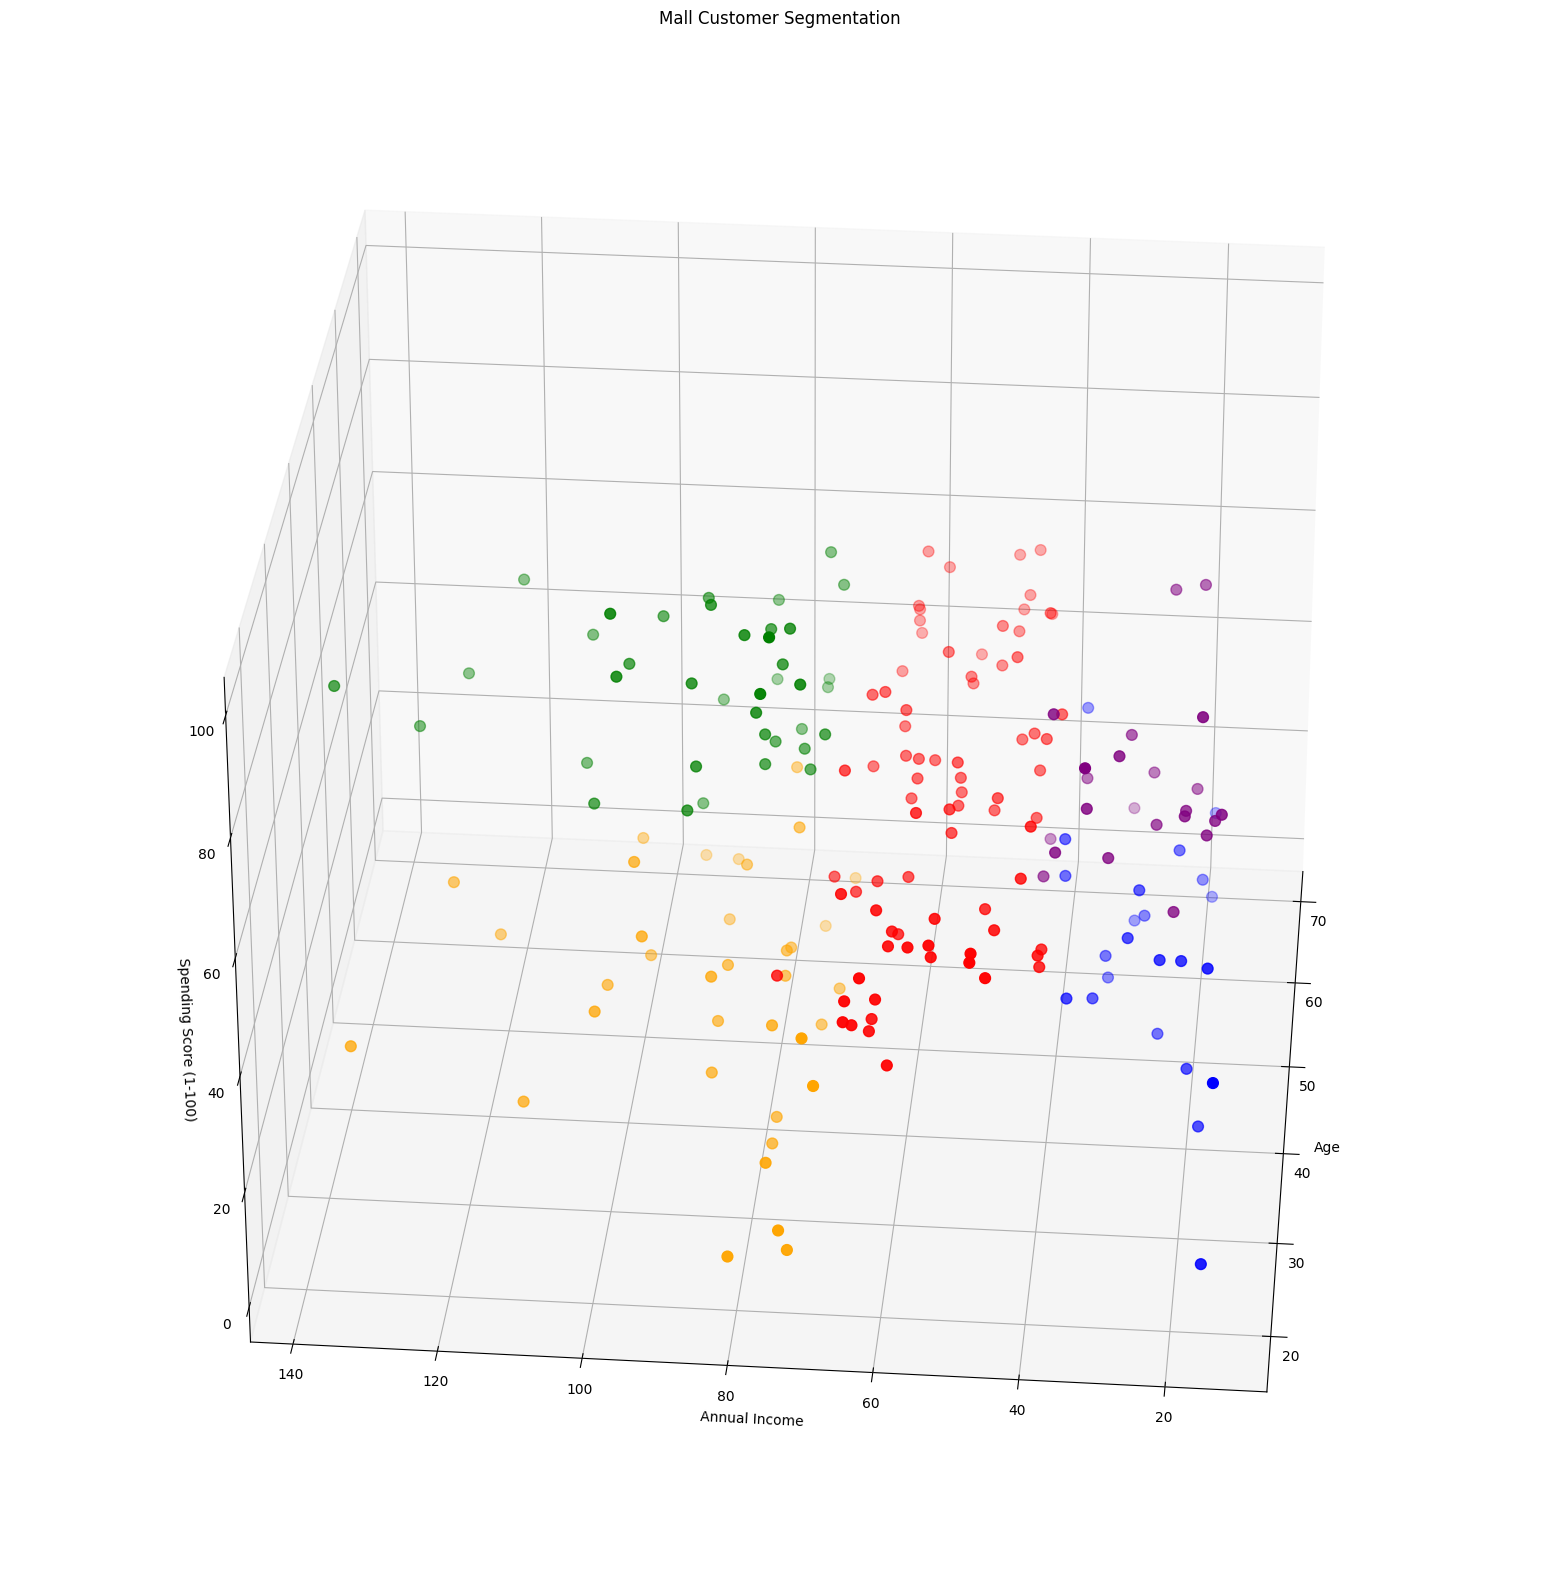

In [22]:

from mpl_toolkits.mplot3d import Axes3D

clusters = kmeans.fit_predict(X3)
df['label'] = clusters


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df['Annual Income (k$)'][df.label == 0], df['Spending Score (1-100)'][df.label == 0], c = 'blue', s = 60)
ax.scatter(df.Age[df.label == 1], df['Annual Income (k$)'][df.label == 1], df['Spending Score (1-100)'][df.label == 1], c = 'red', s = 60)
ax.scatter(df.Age[df.label == 2], df['Annual Income (k$)'][df.label == 2], df['Spending Score (1-100)'][df.label == 2], c = 'green', s = 60)
ax.scatter(df.Age[df.label == 3], df['Annual Income (k$)'][df.label == 3], df['Spending Score (1-100)'][df.label == 3], c = 'orange', s = 60)
ax.scatter(df.Age[df.label == 4], df['Annual Income (k$)'][df.label == 4], df['Spending Score (1-100)'][df.label == 4], c = 'purple', s = 60)
ax.view_init(30,185)

plt.title('Mall Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')

plt.show()